## CREANDO GRÁFICOS CON MATLPLOTLIB

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Lista de datos
x = np.linspace(-8, 7, 20)
y = x**2


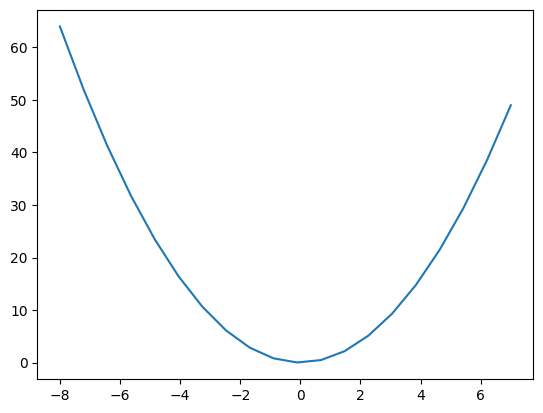

In [18]:
plt.plot(x, y)
plt.show()

### Ya se pudo gráficar en cierto modo lo que se esta buscando obtener para ello